In [1]:
import pandas as pd
pd.set_option("display.max.columns", 50)

In [2]:
path = "/content/drive/MyDrive/Data/Telco_customer_churn.csv"
df = pd.read_csv(path)
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [3]:
!pip install scikit-learn==1.2.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 45.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.29.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.2.0 which is incompatible.
mlxtend 0.23.3 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.0 which is incompatible.


In [4]:
import importlib
import sklearn
importlib.reload(sklearn)

<module 'sklearn' from '/usr/local/lib/python3.10/dist-packages/sklearn/__init__.py'>

In [5]:
# Packages for Approach 1: XGBoost with GridSearchCV and SHAP Values Analysis
import numpy as np
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab
from matplotlib import figure
import graphviz
import os
import shap
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, roc_curve, auc, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, roc_curve, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
import warnings

In [6]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 2.2 MB/s eta 0:00:00


In [7]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.3 MB/s eta 0:00:00


In [8]:
# Packages for Approach 2: XGBoost with BayesSearchCV and Feature Importance plotting.
from sklearn.pipeline import Pipeline
from category_encoders.target_encoder import TargetEncoder
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

In [9]:
warnings.filterwarnings("ignore")
# %matplotlib inline
# pd.options.mode.chained_assignment = None

In [10]:
# Explore the data as imported. The data set has 7043 observations across 33 variables. The df index is rangeindex.
print(df.index)
print(df.size)
print(df.shape)
df.dtypes

RangeIndex(start=0, stop=7043, step=1)
232419
(7043, 33)


,0
CustomerID,object
Count,int64
Country,object
State,object
City,object
Zip Code,int64
Lat Long,object
Latitude,float64
Longitude,float64
Gender,object


In [11]:
df["Churn Reason"].value_counts()

,count
Churn Reason,
Attitude of support person,192
Competitor offered higher download speeds,189
Competitor offered more data,162
Don't know,154
Competitor made better offer,140
Attitude of service provider,135
Competitor had better devices,130
Network reliability,103
Product dissatisfaction,102


We see several reasons for churn; however, as will be shown below, the churn reason was captured only for 27% or 505 customers who cancelled their services. Considering the high cardinality of reasons - many choices spread over 505 records - this information is insufficient.

## **Finding and Managing Missing Data (consistent with the XGBoost algorithm's requirements)**

In [12]:
# First, check for missing data, using a for loop with isnull()
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print("{} - {}%".format(col, round(pct_missing*100)))

CustomerID - 0%
Count - 0%
Country - 0%
State - 0%
City - 0%
Zip Code - 0%
Lat Long - 0%
Latitude - 0%
Longitude - 0%
Gender - 0%
Senior Citizen - 0%
Partner - 0%
Dependents - 0%
Tenure Months - 0%
Phone Service - 0%
Multiple Lines - 0%
Internet Service - 0%
Online Security - 0%
Online Backup - 0%
Device Protection - 0%
Tech Support - 0%
Streaming TV - 0%
Streaming Movies - 0%
Contract - 0%
Paperless Billing - 0%
Payment Method - 0%
Monthly Charges - 0%
Total Charges - 0%
Churn Label - 0%
Churn Value - 0%
Churn Score - 0%
CLTV - 0%
Churn Reason - 73%


In [13]:
# Another check for NA.
df.isna().any()

,0
CustomerID,False
Count,False
Country,False
State,False
City,False
Zip Code,False
Lat Long,False
Latitude,False
Longitude,False
Gender,False


The missing data in the column "Churn Reason" can be disregarded because this variable will be removed for the analysis.
However, as an incidental discovery, a 73% missing data rate should be reported back to the responsible department for process improvement.

In [16]:
# Check the Total Charges variable which shows up as "object" but must be a float.
df["Total Charges"].unique()[0:10]

array(['108.15', '151.65', '820.5', '3046.05', '5036.3', '528.35',
       '39.65', '20.15', '4749.15', '30.2'], dtype=object)

In [17]:
# Check if there is missing data as blanks for the "Total Charges" variable.
len(df.loc[df["Total Charges"] == " "])

11

In [18]:
# Explore the 11 missing observations in the context of the data set.
df.loc[df["Total Charges"] == " "]

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
2234,4472-LVYGI,1,United States,California,San Bernardino,92408,"34.084909, -117.258107",34.084909,-117.258107,Female,No,Yes,No,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No,0,36,2578,NaN
2438,3115-CZMZD,1,United States,California,Independence,93526,"36.869584, -118.189241",36.869584,-118.189241,Male,No,No,No,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No,0,68,5504,NaN
2568,5709-LVOEQ,1,United States,California,San Mateo,94401,"37.590421, -122.306467",37.590421,-122.306467,Female,No,Yes,No,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No,0,45,2048,NaN
2667,4367-NUYAO,1,United States,California,Cupertino,95014,"37.306612, -122.080621",37.306612,-122.080621,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No,0,48,4950,NaN
2856,1371-DWPAZ,1,United States,California,Redcrest,95569,"40.363446, -123.835041",40.363446,-123.835041,Female,No,Yes,No,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No,0,30,4740,NaN
4331,7644-OMVMY,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No,0,53,2019,NaN
4687,3213-VVOLG,1,United States,California,Sun City,92585,"33.739412, -117.173334",33.739412,-117.173334,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No,0,49,2299,NaN
5104,2520-SGTTA,1,United States,California,Ben Lomond,95005,"37.078873, -122.090386",37.078873,-122.090386,Female,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No,0,27,3763,NaN
5719,2923-ARZLG,1,United States,California,La Verne,91750,"34.144703, -117.770299",34.144703,-117.770299,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No,0,69,4890,NaN
6772,4075-WKNIU,1,United States,California,Bell,90201,"33.970343, -118.171368",33.970343,-118.171368,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No,0,44,2342,NaN


The 11 missing Total Charges belong to the customers with zero Tenure Months and who are still with the
company indicating that these are new customers. It is reasonable to assgn $0 to their Total Charges.

In [10]:
# Assign zero to the new customers' Total Charges.
df.loc[(df["Total Charges"] == " "), "Total Charges"] = 0
df.loc[df["Tenure Months"] == 0]

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
2234,4472-LVYGI,1,United States,California,San Bernardino,92408,"34.084909, -117.258107",34.084909,-117.258107,Female,No,Yes,No,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0,No,0,36,2578,NaN
2438,3115-CZMZD,1,United States,California,Independence,93526,"36.869584, -118.189241",36.869584,-118.189241,Male,No,No,No,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0,No,0,68,5504,NaN
2568,5709-LVOEQ,1,United States,California,San Mateo,94401,"37.590421, -122.306467",37.590421,-122.306467,Female,No,Yes,No,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0,No,0,45,2048,NaN
2667,4367-NUYAO,1,United States,California,Cupertino,95014,"37.306612, -122.080621",37.306612,-122.080621,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0,No,0,48,4950,NaN
2856,1371-DWPAZ,1,United States,California,Redcrest,95569,"40.363446, -123.835041",40.363446,-123.835041,Female,No,Yes,No,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0,No,0,30,4740,NaN
4331,7644-OMVMY,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0,No,0,53,2019,NaN
4687,3213-VVOLG,1,United States,California,Sun City,92585,"33.739412, -117.173334",33.739412,-117.173334,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0,No,0,49,2299,NaN
5104,2520-SGTTA,1,United States,California,Ben Lomond,95005,"37.078873, -122.090386",37.078873,-122.090386,Female,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0,No,0,27,3763,NaN
5719,2923-ARZLG,1,United States,California,La Verne,91750,"34.144703, -117.770299",34.144703,-117.770299,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0,No,0,69,4890,NaN
6772,4075-WKNIU,1,United States,California,Bell,90201,"33.970343, -118.171368",33.970343,-118.171368,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0,No,0,44,2342,NaN


In [20]:
# Check other numeric variables for blanks.
len(df.loc[df["Zip Code"] == " "])
len(df.loc[df["Latitude"] == " "])
len(df.loc[df["Longitude"] == " "])
len(df.loc[df["Monthly Charges"] == " "])

0

In [11]:
# Conver the variable "Total Charges" to float/numeric.
df["Total Charges"] = pd.to_numeric(df["Total Charges"])
df["Total Charges"].dtypes

dtype('float64')

# **Data Visualization and Feature Engineering**

In [12]:
# Remove the columns not needed for the analysis: a) those that define the target variable, "churn";
# and b) those with no predictive capacity.
df.drop(["Churn Label", "Churn Score", "CLTV", "Churn Reason"], axis = 1, inplace = True)
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Value'],
      dtype='object')

In [13]:
df.drop(["CustomerID", "Count", "Country", "State", "Lat Long", "Latitude", "Longitude"], axis = 1, inplace = True)
df.columns

Index(['City', 'Zip Code', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Value'],
      dtype='object')

<Axes: >

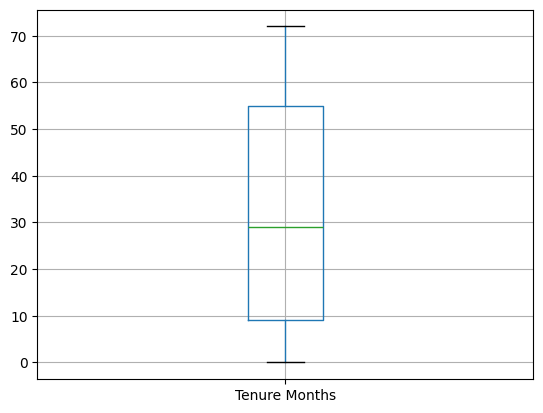

In [24]:
# Check for outliers in select numeric features. With standard rates, no outliers are expected.
# Tenure Months
df.boxplot(column = ["Tenure Months"])
# Monthly Charges
# df.boxplot(column = ["Monthly Charges"])

There are no outliers in these features. The monthly charges tend to be left-skewed (lower charges are more common), while the number of months with the company is slightly right-skewed, suggesting longer tenures.

<Axes: >

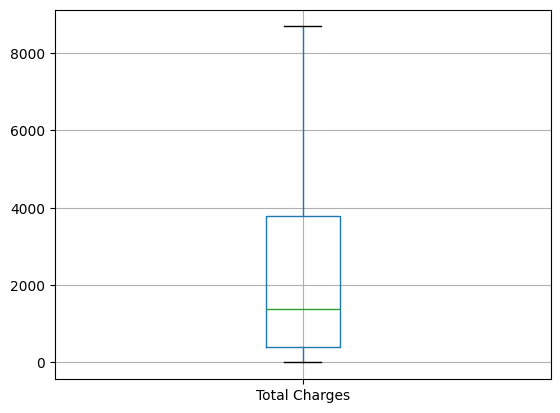

In [25]:
# Check Total Charges for outliers as well.
df.boxplot(column = ["Total Charges"])

array([[<Axes: title={'center': 'Total_Charges'}>]], dtype=object)

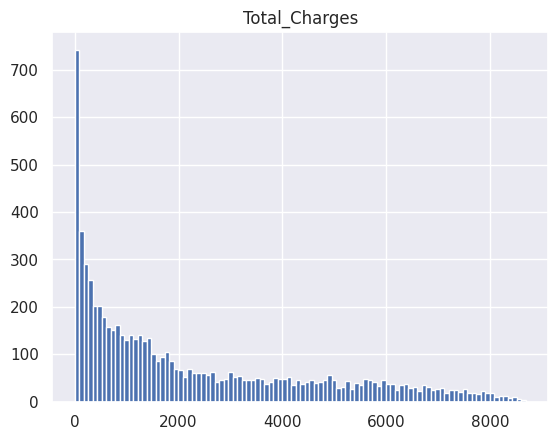

In [98]:
df.hist(column = "Total_Charges", bins = 100)

array([[<Axes: title={'center': 'Total_Charges_Log10'}>]], dtype=object)

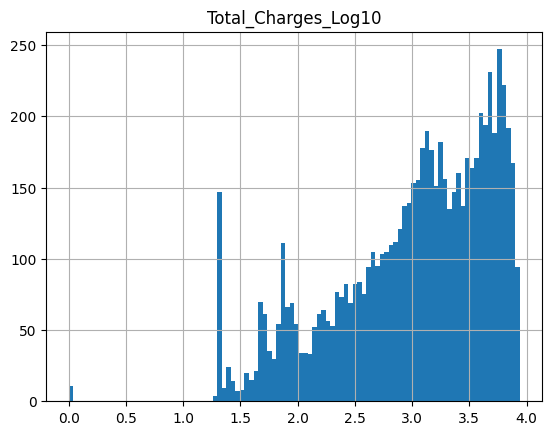

In [16]:
# Take a log of the Total Charges variable to scale the distribution.
# Note: for the 11 records with Total Charges = 0, this transformation will result in negative values,
# making plotting and further calculations impractical. The solution is to add a small positive constant (1 which will equal $1) to each individual record.
df_log = df.copy()
df_log["Total_Charges_Log10"] = np.log10(df_log["Total Charges"] + 1)
df_log.hist(column=["Total_Charges_Log10"], bins=100)

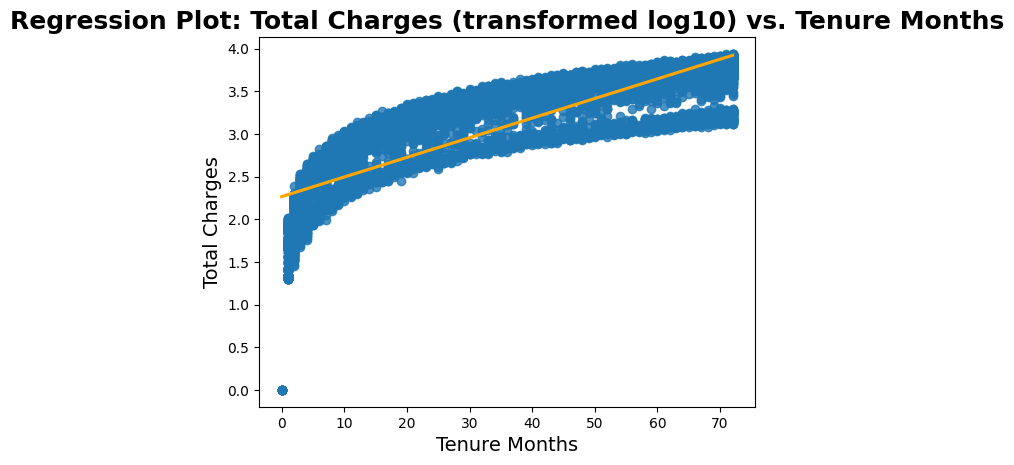

In [17]:
plt.figure()
ax = sns.regplot(x = "Tenure Months", y = "Total_Charges_Log10", data = df_log, line_kws={"color": "orange"})
ax.set_title("Regression Plot: Total Charges (transformed log10) vs. Tenure Months", fontsize = 18, fontweight='bold' )
ax.set_xlabel("Tenure Months", fontsize = 14)
ax.set_ylabel("Total Charges", fontsize = 14)
plt.show()

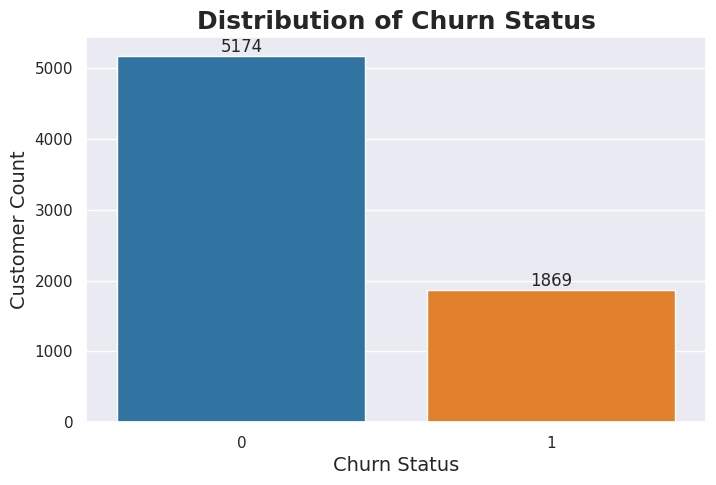

In [27]:
# Check the distribution of the target variable, the churn status, to see if there is class misbalance.
sns.set(style="darkgrid")
countplot, ax = plt.subplots(figsize = (8,5))
ax = sns.countplot(x = df["Churn Value"], data = df, palette = "tab10")
ax.set_title("Distribution of Churn Status",fontsize = 18, fontweight='bold' )
ax.set_xlabel("Churn Status", fontsize = 14)
ax.set_ylabel("Customer Count", fontsize = 14)
for label in ax.containers:
    ax.bar_label(label)

plt.show()

We see a misbalanced distribution: more customers stay with the company that churn: just about 26.5% have left the company.

A correlation matrix among select features can be helpful in initial understanding of variable relationships. It can give an idea of what features may turn out as strong classifiers.

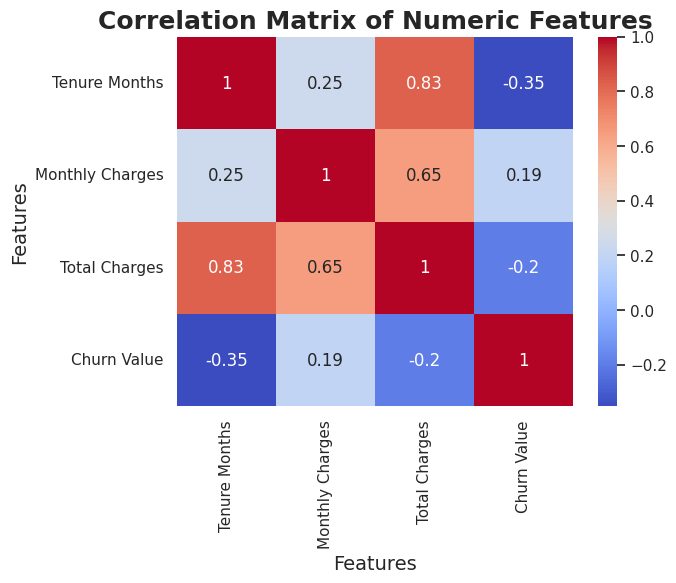

In [29]:
# Let's start with the numeric features.
corr_subset = ["Gender", "Senior Citizen", "Partner", "Dependents", "Tenure Months", "Phone Service", "Multiple Lines",
               "Internet Service", "Online Security", "Online Backup", "Device Protection", "Tech Support",
               "Streaming TV", "Streaming Movies", "Contract", "Paperless Billing",
               "Payment Method", "Monthly Charges", "Total Charges", "Churn Value"]

num_subset = df[corr_subset].select_dtypes(include = ["number"])

num_corr = num_subset.corr(method = "pearson")
ax = sns.heatmap(num_corr, annot = True, cmap = "coolwarm")
ax.set_title("Correlation Matrix of Numeric Features",fontsize = 18, fontweight='bold' )
ax.set_xlabel("Features", fontsize = 14)
ax.set_ylabel("Features", fontsize = 14)
plt.show()

As expected, we see strong positive correlation between Total Charges and Tenure Months, moderate correlation between Total Charges and Monthly Charges, and weak negative correlation between the Churn status and Tenure Months.

It would be helpful to view the correlation for the categorical features as well.

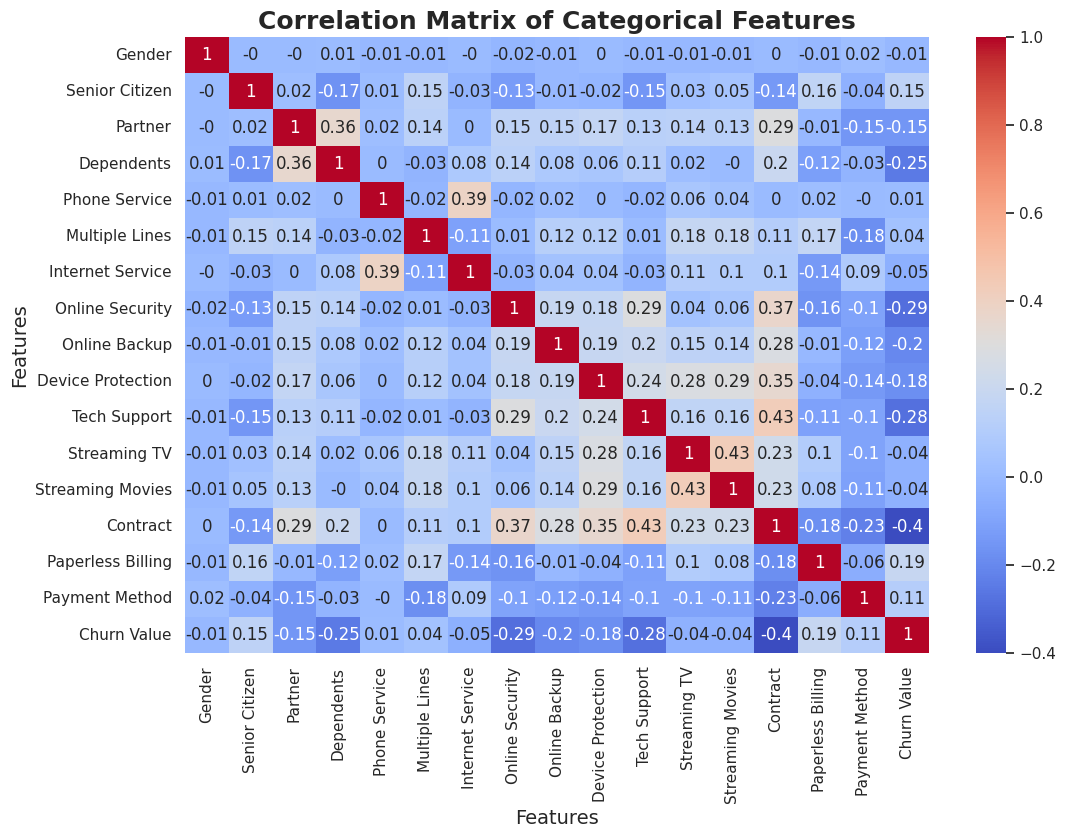

In [31]:
# Encode categorical features.
cat_corr_df = df.copy()

# Encoding categorical predictors using LabelEncoder
encoder = LabelEncoder()
cat_corr_df["City"] = encoder.fit_transform(cat_corr_df["City"])
cat_corr_df["Gender"] = encoder.fit_transform(cat_corr_df["Gender"])
cat_corr_df["Senior Citizen"] = encoder.fit_transform(cat_corr_df["Senior Citizen"])
cat_corr_df["Partner"] = encoder.fit_transform(cat_corr_df["Partner"])
cat_corr_df["Dependents"] = encoder.fit_transform(cat_corr_df["Dependents"])
cat_corr_df["Phone Service"] = encoder.fit_transform(cat_corr_df["Phone Service"])
cat_corr_df["Multiple Lines"] = encoder.fit_transform(cat_corr_df["Multiple Lines"])
cat_corr_df["Internet Service"] = encoder.fit_transform(cat_corr_df["Internet Service"])
cat_corr_df["Online Security"] = encoder.fit_transform(cat_corr_df["Online Security"])
cat_corr_df["Online Backup"] = encoder.fit_transform(cat_corr_df["Online Backup"])
cat_corr_df["Device Protection"] = encoder.fit_transform(cat_corr_df["Device Protection"])
cat_corr_df["Tech Support"] = encoder.fit_transform(cat_corr_df["Tech Support"])
cat_corr_df["Streaming TV"] = encoder.fit_transform(cat_corr_df["Streaming TV"])
cat_corr_df["Streaming Movies"] = encoder.fit_transform(cat_corr_df["Streaming Movies"])
cat_corr_df["Contract"] = encoder.fit_transform(cat_corr_df["Contract"])
cat_corr_df["Paperless Billing"] = encoder.fit_transform(cat_corr_df["Paperless Billing"])
cat_corr_df["Payment Method"] = encoder.fit_transform(cat_corr_df["Payment Method"])


cat_corr = cat_corr_df.corr(method = "pearson").round(2)
ax = plt.subplots(figsize = (12, 8))
ax = sns.heatmap(cat_corr, annot = True, cmap = "coolwarm")
ax.set_title("Correlation Matrix of Categorical Features",fontsize = 18, fontweight='bold' )
ax.set_xlabel("Features", fontsize = 14)
ax.set_ylabel("Features", fontsize = 14)
plt.show()

At a first glance, there are some moderate relationships. We can extract those that exceed the coefficient with the absolute value of 0.3.

In [32]:
corr_pairs = cat_corr.unstack()
sorted_pairs = corr_pairs.sort_values(kind = "quicksort")
moderate_pairs = sorted_pairs[abs(sorted_pairs) > 0.3]
print(moderate_pairs.head(14))

Churn Value        Contract            -0.40
Contract           Churn Value         -0.40
Device Protection  Contract             0.35
Contract           Device Protection    0.35
Partner            Dependents           0.36
Dependents         Partner              0.36
Online Security    Contract             0.37
Contract           Online Security      0.37
Phone Service      Internet Service     0.39
Internet Service   Phone Service        0.39
Tech Support       Contract             0.43
Streaming Movies   Streaming TV         0.43
Streaming TV       Streaming Movies     0.43
Contract           Tech Support         0.43
dtype: float64


A few moderate relationships emerge. The target variable is negatively correlated with Contract, a multi-level categorical variable.  

In [34]:
# Optional: re-checking the correlation between the target variable and Contract predictor.
# Create an instance of LabelEncoder
encoder_contract = LabelEncoder()

# Label encode the categorical variable Contract.
cat_corr_df["Contract"] = encoder.fit_transform(cat_corr_df["Contract"])

# Compute the correlation between the numeric target and the encoded categorical variable
corr_contract = cat_corr_df["Churn Value"].corr(cat_corr_df["Contract"]).round(2)

# Display the correlation
print("Correlation between Target and Category (encoded):", corr_contract)

Correlation between Target and Category (encoded): -0.4


No white spaces are accepted in drawing the classifier tree, therefore white spaces in variable "City Names" and columns headings will be removed.

In [35]:
# Check the City variable.
df["City"].unique()

array(['Los Angeles', 'Beverly Hills', 'Huntington Park', ..., 'Standish',
       'Tulelake', 'Olympic Valley'], dtype=object)

In [14]:
df["City"].replace(" ", "_", regex = True, inplace = True)
df["City"].unique()[0:10]

array(['Los_Angeles', 'Beverly_Hills', 'Huntington_Park', 'Lynwood',
       'Marina_Del_Rey', 'Inglewood', 'Santa_Monica', 'Torrance',
       'Whittier', 'La_Habra'], dtype=object)

In [15]:
# Remove white space from column headers
df.columns = df.columns.str.replace(" ", "_")

In [16]:
# Replace blanks with "_" across the entire dataframe.
df.replace(" ", "_", regex = True, inplace = True)
df.head(25)

,City,Zip_Code,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
0,Los_Angeles,90003,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15,1
1,Los_Angeles,90005,Female,No,No,Yes,2,Yes,No,Fiber_optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65,1
2,Los_Angeles,90006,Female,No,No,Yes,8,Yes,Yes,Fiber_optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic_check,99.65,820.50,1
3,Los_Angeles,90010,Female,No,Yes,Yes,28,Yes,Yes,Fiber_optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic_check,104.80,3046.05,1
4,Los_Angeles,90015,Male,No,No,Yes,49,Yes,Yes,Fiber_optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank_transfer_(automatic),103.70,5036.30,1
5,Los_Angeles,90020,Female,No,Yes,No,10,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Credit_card_(automatic),55.20,528.35,1
6,Los_Angeles,90022,Male,Yes,No,No,1,No,No_phone_service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic_check,39.65,39.65,1
7,Los_Angeles,90024,Male,No,No,No,1,Yes,No,No,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,Month-to-month,No,Mailed_check,20.15,20.15,1
8,Los_Angeles,90028,Male,No,Yes,Yes,47,Yes,Yes,Fiber_optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic_check,99.35,4749.15,1
9,Los_Angeles,90029,Male,No,Yes,No,1,No,No_phone_service,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic_check,30.20,30.20,1


In [17]:
# It is recommeded to do the split between independent/feature and dependent/target variables before feature engineering
# as the latter becomes more straighforward following the separation and no data will be lost even if rows are removed.
# X will conventionally represent predictors/features while y the label to predict, Churn Value. The default 75/25 split is used.

X = df.drop(["Churn_Value"], axis = 1).copy() # use copy() to decouple the feature set from the parent data set.
X.head()

,City,Zip_Code,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges
0,Los_Angeles,90003,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15
1,Los_Angeles,90005,Female,No,No,Yes,2,Yes,No,Fiber_optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65
2,Los_Angeles,90006,Female,No,No,Yes,8,Yes,Yes,Fiber_optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic_check,99.65,820.50
3,Los_Angeles,90010,Female,No,Yes,Yes,28,Yes,Yes,Fiber_optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic_check,104.80,3046.05
4,Los_Angeles,90015,Male,No,No,Yes,49,Yes,Yes,Fiber_optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank_transfer_(automatic),103.70,5036.30


In [18]:
y = df["Churn_Value"].copy()
y.unique()

array([1, 0])

Feature Processing: One-Hot Encoding

In [39]:
# Recall the data types.
X.dtypes

,0
City,object
Zip_Code,int64
Latitude,float64
Longitude,float64
Gender,object
Senior_Citizen,object
Partner,object
Dependents,object
Tenure_Months,int64
Phone_Service,object


In [41]:
# For one-hot encoding, the get_dummies() function from pandas will be used.
# Test for one feature.
print(df["Payment_Method"].unique())
pd.get_dummies(X, columns = ["Payment_Method"], dtype = "int64").head()

['Mailed check' 'Electronic check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


,City,Zip_Code,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Monthly_Charges,Total_Charges,Payment_Method_Bank transfer (automatic),Payment_Method_Credit card (automatic),Payment_Method_Electronic check,Payment_Method_Mailed check
0,Los_Angeles,90003,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,53.85,108.15,0,0,0,1
1,Los_Angeles,90005,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,70.70,151.65,0,0,1,0
2,Los_Angeles,90006,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,99.65,820.50,0,0,1,0
3,Los_Angeles,90010,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,104.80,3046.05,0,0,1,0
4,Los_Angeles,90015,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,103.70,5036.30,1,0,0,0


In [19]:
X_encoded = pd.get_dummies(X, columns = ['City',
                                         'Gender',
                                         'Senior_Citizen',
                                         'Partner',
                                         'Dependents',
                                         'Phone_Service',
                                         'Multiple_Lines',
                                         'Internet_Service',
                                         'Online_Security',
                                         'Online_Backup',
                                         'Device_Protection',
                                         'Tech_Support',
                                         'Streaming_TV',
                                         'Streaming_Movies',
                                         'Contract',
                                         'Paperless_Billing',
                                         'Payment_Method'], dtype = int)
X_encoded.head()

,Zip_Code,Tenure_Months,Monthly_Charges,Total_Charges,City_Acampo,City_Acton,City_Adelanto,City_Adin,City_Agoura_Hills,City_Aguanga,City_Ahwahnee,City_Alameda,City_Alamo,City_Albany,City_Albion,City_Alderpoint,City_Alhambra,City_Aliso_Viejo,City_Alleghany,City_Alpaugh,City_Alpine,City_Alta,City_Altadena,City_Alturas,City_Alviso,...,Online_Security_Yes,Online_Backup_No,Online_Backup_No_internet_service,Online_Backup_Yes,Device_Protection_No,Device_Protection_No_internet_service,Device_Protection_Yes,Tech_Support_No,Tech_Support_No_internet_service,Tech_Support_Yes,Streaming_TV_No,Streaming_TV_No_internet_service,Streaming_TV_Yes,Streaming_Movies_No,Streaming_Movies_No_internet_service,Streaming_Movies_Yes,Contract_Month-to-month,Contract_One_year,Contract_Two_year,Paperless_Billing_No,Paperless_Billing_Yes,Payment_Method_Bank_transfer_(automatic),Payment_Method_Credit_card_(automatic),Payment_Method_Electronic_check,Payment_Method_Mailed_check
0,90003,2,53.85,108.15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
1,90005,2,70.70,151.65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
2,90006,8,99.65,820.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0
3,90010,28,104.80,3046.05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0
4,90015,49,103.70,5036.30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0


Build the first XGBoost model and assess its performance .

In [44]:
# The first step is to split the data set into training and test subsets.
# As it has been observed, there is a misbalance of classed in the target variable.
# More specifically, only about 27% of customers have churned.
percent_churned =round(((1869*100)/7043), 2)
percent_churned

26.54

In [21]:
# To overcome the misbalance and avoid underrepresentation of churned customers, stratification sampling technique will be used.
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state = 42, stratify = y)
print(len(X_train))
print(len(X_test))
churned_y_train = sum(y_train)/len(y_train)
churned_y_train
churned_y_test = sum(y_test)/len(y_test)
churned_y_test

5282
1761


0.26519023282226006

In [22]:
# Create a variable to store trees. The preliminary model trains on the training set; test data are used to evaluating
# the number of trees. The early stopping parameter will be used to control overfitting.
prelim_xgb = xgb.XGBClassifier(objective = "binary:logistic", seed = 42, eval_metric = "aucpr", early_stopping_rounds = 10)

# Fit the model.
prelim_xgb.fit(X_train, y_train, verbose = True, eval_set = [(X_test, y_test)])

[0]	validation_0-aucpr:0.64346
[1]	validation_0-aucpr:0.65113
[2]	validation_0-aucpr:0.65848
[3]	validation_0-aucpr:0.65531
[4]	validation_0-aucpr:0.65540
[5]	validation_0-aucpr:0.66189
[6]	validation_0-aucpr:0.66358
[7]	validation_0-aucpr:0.66538
[8]	validation_0-aucpr:0.66556
[9]	validation_0-aucpr:0.66911
[10]	validation_0-aucpr:0.66607
[11]	validation_0-aucpr:0.66601
[12]	validation_0-aucpr:0.66616
[13]	validation_0-aucpr:0.66239
[14]	validation_0-aucpr:0.66043
[15]	validation_0-aucpr:0.66435
[16]	validation_0-aucpr:0.66389
[17]	validation_0-aucpr:0.66317
[18]	validation_0-aucpr:0.66233


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

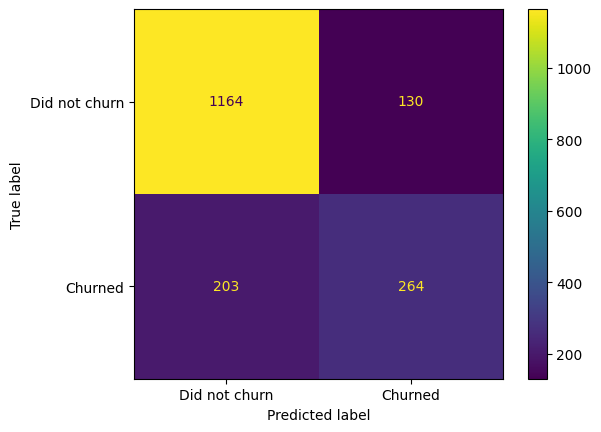

In [26]:
# Now use the model to classify the test data and report performance in a Confusion Matrix.
ConfusionMatrixDisplay.from_estimator(prelim_xgb, X_test, y_test,
                                      values_format = "d", display_labels = ["Did not churn", "Churned"])
plt.grid(False)
plt.show()

There are 1,761 records in the test set: 1,294 who did not churn and 467 who churned.
Thus, among those who did not leave the company, 90% (1,1604) were classified correctly. This leaves as much as 10% (130) as False Positives.
And, among those who did leave, 54% (264) were classified correctly, with as many as 203 or 46% representing False Negatives.
It is clear that the imbalance of the two classes persists and skews results. Considering the goal of the task - to predict
customers likely to leave the company - focus should be placed on reducing the number of False Negatives, i.e., customers predicted
not to churn but who, in reality, did cancel their services.¶

In [27]:
# Access model performance metrics.
# Accuracy Score
y_pred1a = prelim_xgb.predict(X_test)
accuracy1a = accuracy_score(y_test, y_pred1a) # Sum of TP and TN over Total.
accuracy1a = round(accuracy1a*100, 2)
print(f"The Accuracy score of the preliminary model is {accuracy1a}.")

# FN rate - primary focus of the model
tn1a, fp1a, fn1a, tp1a = confusion_matrix(y_test, y_pred1a).ravel()
fnr1a = fn1a/(fn1a + tp1a)
fnr1a = round(fnr1a*100, 2)
print(f"The False Negative rate of the preliminary model is {fnr1a}.")

# F1 Score (harmonic mean of Precision and Recall)
precision1a = precision_score(y_test, y_pred1a) # Out of all pos labeled, how many TP? TP/(TP+FP)
precision1a = round(precision1a*100, 2)
print(f"The Precision score of the preliminary model is {precision1a}.")
recall1a = recall_score(y_test, y_pred1a) # Out of all truly pos, how many TP? TP/(TP + FN)
recall1a = round(recall1a*100, 2)
print(f"The Recall score of the preliminary model is {recall1a}.")
f1_score1a = f1_score(y_test, y_pred1a)
f1_score1a = round(f1_score1a, 2)
print(f"The F1 score of the preliminary model is {f1_score1a}.")

The Accuracy score of the preliminary model is 81.09.
The False Negative rate of the preliminary model is 43.47.
The Precision score of the preliminary model is 67.01.
The Recall score of the preliminary model is 56.53.
The F1 score of the preliminary model is 0.61.


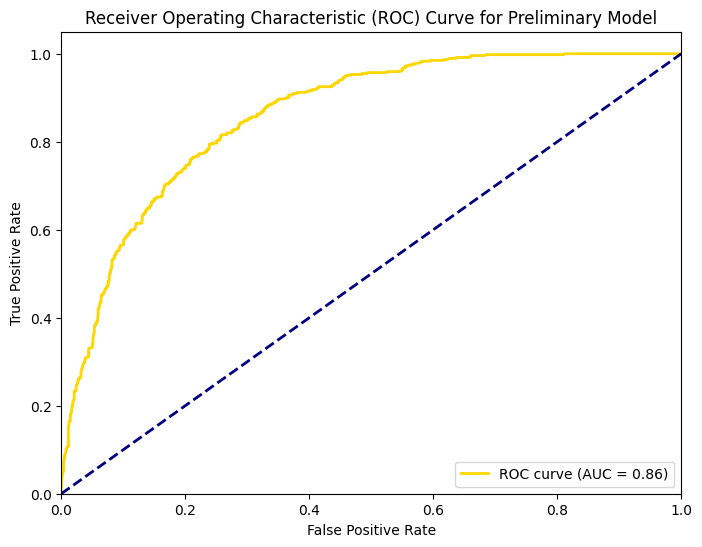

In [30]:
# Plot ROC
# Predict probabilities for the positive class
y_prob1a = prelim_xgb.predict_proba(X_test)[:, 1] # [:, 1] selects the second col which is p(pos class)

# Calculate ROC curve
fpr1a, tpr1a, thresholds1a = roc_curve(y_test, y_prob1a)
roc_auc1a = auc(fpr1a, tpr1a)

plt.figure(figsize=(8, 6))
plt.plot(fpr1a, tpr1a, color='gold', lw=2, label=f'ROC curve (AUC = {roc_auc1a:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Random classifier line / naive prediction
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Preliminary Model')
plt.legend(loc='lower right')
plt.show()


Improve the initial model with hyperparameter tuning and re-assess performance.

The model improvement can include:
1. Performing a GridSearchCV by setting select hyperparamers to initial values and adjusting as needed.
2. Managing the class imbalance by tuning the hyperparamer "scale_pos_weight" which is recommended for this purpose. The AUC is used for evaluating performance of models.

NOTE: To overcome processing constraints, the param_grid has been reduced to a manageable choice of parameters and n_jobs has been decreased to one.  

In [48]:
reduced_param_grid = {
    'max_depth': [3, 4],
    'learning_rate': [0.1, 0.05],
    'gamma': [0, 0.25],
    'reg_lambda': [0, 1.0],
    'scale_pos_weight': [1, 3]
}

optimal_params = GridSearchCV(
    estimator=xgb.XGBClassifier(objective='binary:logistic',
                                eval_metric="logloss",
                                seed=42,
                                subsample=0.9, # Using random 90% of data from the test set per tree.
                                colsample_bytree=0.5), # Using 50% randomly of columns in the test set per tree.
    param_grid=reduced_param_grid,
    scoring='roc_auc',
    verbose=2,
    n_jobs = 1,
    cv = 3
)

optimal_params.estimator.set_params(**{"eval_metric":"auc", "early_stopping_rounds":10})

optimal_params.fit(X_train,
                   y_train,
                   eval_set=[(X_test, y_test)],
                   verbose=False)
print(optimal_params.best_params_)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] END gamma=0, learning_rate=0.1, max_depth=3, reg_lambda=0, scale_pos_weight=1; total time=   4.0s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, reg_lambda=0, scale_pos_weight=1; total time=   4.8s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, reg_lambda=0, scale_pos_weight=1; total time=   6.8s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, reg_lambda=0, scale_pos_weight=3; total time=   3.9s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, reg_lambda=0, scale_pos_weight=3; total time=   4.2s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, reg_lambda=0, scale_pos_weight=3; total time=   6.9s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, reg_lambda=1.0, scale_pos_weight=1; total time=   4.0s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, reg_lambda=1.0, scale_pos_weight=1; total time=   9.3s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, reg_lambda=1.0, scale_pos_weight=1; total time=   5.1s
[CV] E

The results of the Grid Search yield the following optimal parameters: gamma = 0.25, learn_rate = 0.05, max_depth = 4, scale_pos_weight = 1, and reg_lambda = 10.

In [23]:
clf_xgb_final = xgb.XGBClassifier(seed=42,
                            missing=0,
                            objective='binary:logistic',
                            gamma=0.25,
                            learning_rate=0.05,
                            max_depth=4,
                            reg_lambda=10,
                            scale_pos_weight=3,
                            subsample=0.9,
                            colsample_bytree=0.5,
                            early_stopping_rounds=10,
                            eval_metric='aucpr')
clf_xgb_final.fit(X_train,
            y_train,
            verbose=True,
            eval_set=[(X_test, y_test)])

[0]	validation_0-aucpr:0.58794
[1]	validation_0-aucpr:0.59015
[2]	validation_0-aucpr:0.60358
[3]	validation_0-aucpr:0.61673
[4]	validation_0-aucpr:0.62678
[5]	validation_0-aucpr:0.62984
[6]	validation_0-aucpr:0.63092
[7]	validation_0-aucpr:0.63203
[8]	validation_0-aucpr:0.63298
[9]	validation_0-aucpr:0.63249
[10]	validation_0-aucpr:0.63190
[11]	validation_0-aucpr:0.63283
[12]	validation_0-aucpr:0.63294
[13]	validation_0-aucpr:0.63336
[14]	validation_0-aucpr:0.63283
[15]	validation_0-aucpr:0.63301
[16]	validation_0-aucpr:0.63697
[17]	validation_0-aucpr:0.63322
[18]	validation_0-aucpr:0.63753
[19]	validation_0-aucpr:0.63723
[20]	validation_0-aucpr:0.64457
[21]	validation_0-aucpr:0.64148
[22]	validation_0-aucpr:0.64181
[23]	validation_0-aucpr:0.64197
[24]	validation_0-aucpr:0.64192
[25]	validation_0-aucpr:0.64175
[26]	validation_0-aucpr:0.64164
[27]	validation_0-aucpr:0.63961
[28]	validation_0-aucpr:0.64423
[29]	validation_0-aucpr:0.64928
[30]	validation_0-aucpr:0.65263
[31]	validation_0-

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=0.25, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=0, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

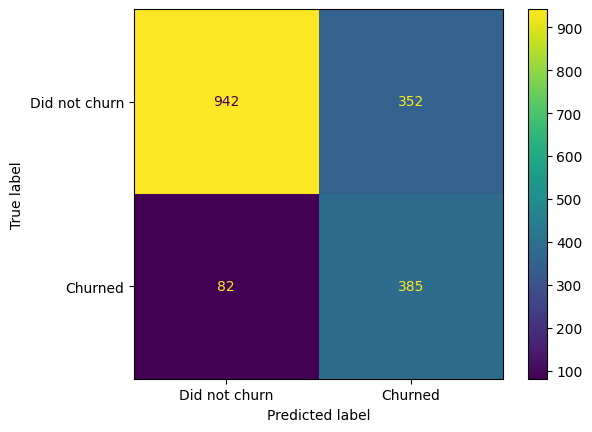

In [28]:
ConfusionMatrixDisplay.from_estimator(clf_xgb_final,
                                      X_test,
                                      y_test,
                                      values_format='d',
                                      display_labels=["Did not churn", "Churned"])
plt.grid(False)
plt.show()

¶ We see significant improvement in the rate of False Negatives, from 203 (46%) to 82 (16%) of the customers who have left the company. However, while advantageous, this improvement comes with the trade-off in an equally significant increase in False Positives from 130 (10%) to as many as 352 (28%), almost triple the original number. Another trade-off can be observed in the decrease of True Negatives, from 1,164 (90%) to 942 (71%).  

In [29]:
# Access model performance metrics.
# Accuracy Score
y_pred1b = clf_xgb_final.predict(X_test)
accuracy1b = accuracy_score(y_test, y_pred1b) # Sum of TP and TN over Total.
accuracy1b = round(accuracy1b*100, 2)
print(f"The Accuracy score of the tuned model is {accuracy1b}.")

# FN rate - primary focus of the model
tn1b, fp1b, fn1b, tp1b = confusion_matrix(y_test, y_pred1b).ravel()
fnr1b = fn1b/(fn1b + tp1b)
fnr1b = round(fnr1b*100, 2)
print(f"The False Negative rate of the tuned model is {fnr1b}.")

# F1 Score (harmonic mean of Precision and Recall)
precision1b = precision_score(y_test, y_pred1b) # Out of all pos labeled, how many TP? TP/(TP+FP)
precision1b = round(precision1b*100, 2)
print(f"The Precision score of the tuned model is {precision1b}.")
recall1b = recall_score(y_test, y_pred1b) # Out of all truly pos, how many TP? TP/(TP + FN)
recall1b = round(recall1b*100, 2)
print(f"The Recall score of the tuned model is {recall1b}.")
f1_score1b = f1_score(y_test, y_pred1b)
f1_score1b = round(f1_score1b, 2)
print(f"The F1 score of the tuned model is {f1_score1b}.")

The Accuracy score of the tuned model is 75.35.
The False Negative rate of the tuned model is 17.56.
The Precision score of the tuned model is 52.24.
The Recall score of the tuned model is 82.44.
The F1 score of the tuned model is 0.64.


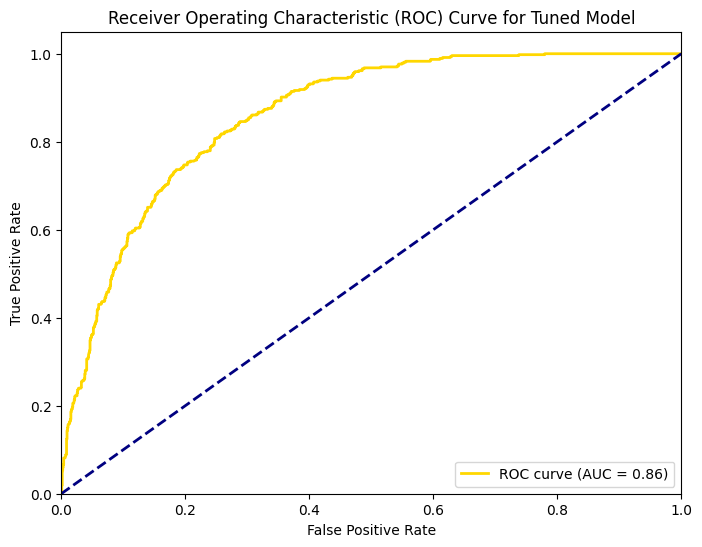

In [32]:
# Plot ROC
# Predict probabilities for the positive class
y_prob1b = clf_xgb_final.predict_proba(X_test)[:, 1] # [:, 1] selects the second col which is p(pos class)

# Calculate ROC curve
fpr1b, tpr1b, thresholds1b = roc_curve(y_test, y_prob1b)
roc_auc1b = auc(fpr1b, tpr1b)

plt.figure(figsize=(8, 6))
plt.plot(fpr1b, tpr1b, color='gold', lw=2, label=f'ROC curve (AUC = {roc_auc1b:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Random classifier line / naive prediction
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Tuned Model')
plt.legend(loc='lower right')
plt.show()

Now we can plot an XGBoost classification tree to track the features' behavior for individual predictions.

In [24]:
clf_xgb_final = xgb.XGBClassifier(seed=42,
                        objective='binary:logistic',
                        gamma=0.25,
                        learning_rate=0.1,
                        max_depth=4,
                        reg_lambda=10,
                        scale_pos_weight=3,
                        subsample=0.9,
                        colsample_bytree=0.5,
                        n_estimators=1) ## Draw only ONE FIRST tree! It provides the starting points.

clf_xgb_final.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.25, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [26]:
bst = clf_xgb_final.get_booster()
for importance_type in ('weight', 'gain', 'cover', 'total_gain', 'total_cover'):
    print('%s: ' % importance_type, bst.get_score(importance_type=importance_type))

node_params = {'shape': 'box',
               'style': 'filled, rounded',
               'fillcolor': '#78cbe'}
leaf_params = {'shape': 'box',
               'style': 'filled',
               'fillcolor': '#e48038'}

weight:  {'Total_Charges': 4.0, 'City_Hayward': 1.0, 'City_Sacramento': 1.0, 'Internet_Service_DSL': 2.0, 'Online_Security_No': 2.0, 'Tech_Support_No': 1.0, 'Streaming_Movies_Yes': 1.0, 'Contract_Month-to-month': 1.0, 'Contract_One_year': 2.0}
gain:  {'Total_Charges': 52.92295455932617, 'City_Hayward': 5.59759521484375, 'City_Sacramento': 12.455390930175781, 'Internet_Service_DSL': 48.45374298095703, 'Online_Security_No': 161.24929809570312, 'Tech_Support_No': 31.054149627685547, 'Streaming_Movies_Yes': 10.859321594238281, 'Contract_Month-to-month': 1645.472412109375, 'Contract_One_year': 25.690189361572266}
cover:  {'Total_Charges': 370.335205078125, 'City_Hayward': 222.38832092285156, 'City_Sacramento': 56.158668518066406, 'Internet_Service_DSL': 517.28369140625, 'Online_Security_No': 904.279296875, 'Tech_Support_No': 316.2356872558594, 'Streaming_Movies_Yes': 127.79216766357422, 'Contract_Month-to-month': 1808.5587158203125, 'Contract_One_year': 189.31710815429688}
total_gain:  {'To

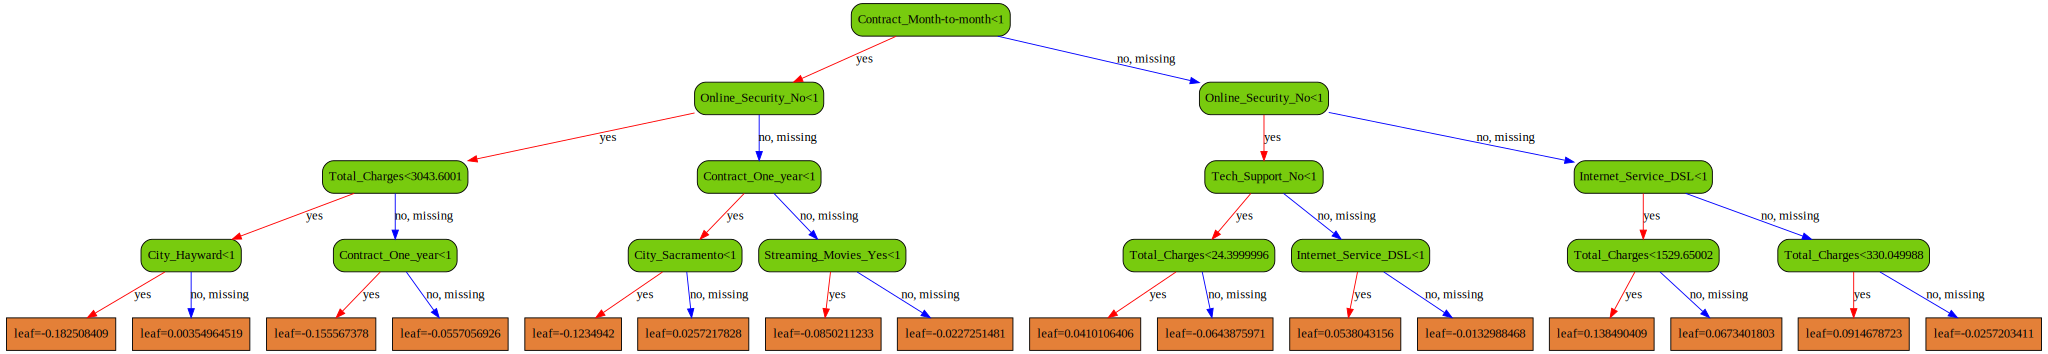

In [27]:
os.environ["PATH"]+= os.pathsep + 'C:\Program Files\Graphviz\bin'
xgb.to_graphviz(clf_xgb_final, num_trees=0,
                condition_node_params=node_params,
                leaf_node_params=leaf_params)

In [34]:
bst2 = clf_xgb_final.get_booster()
for importance_type in ('weight', 'gain', 'cover', 'total_gain', 'total_cover'):
    print('%s: ' % importance_type, bst.get_score(importance_type=importance_type))

node_params2 = {'shape': 'box',
               'style': 'filled, rounded',
               'fillcolor': '#add8e6'}
leaf_params2 = {'shape': 'box',
               'style': 'filled',
               'fillcolor': '#e48038'}

weight:  {'Total_Charges': 4.0, 'City_Hayward': 1.0, 'City_Sacramento': 1.0, 'Internet_Service_DSL': 2.0, 'Online_Security_No': 2.0, 'Tech_Support_No': 1.0, 'Streaming_Movies_Yes': 1.0, 'Contract_Month-to-month': 1.0, 'Contract_One_year': 2.0}
gain:  {'Total_Charges': 52.92295455932617, 'City_Hayward': 5.59759521484375, 'City_Sacramento': 12.455390930175781, 'Internet_Service_DSL': 48.45374298095703, 'Online_Security_No': 161.24929809570312, 'Tech_Support_No': 31.054149627685547, 'Streaming_Movies_Yes': 10.859321594238281, 'Contract_Month-to-month': 1645.472412109375, 'Contract_One_year': 25.690189361572266}
cover:  {'Total_Charges': 370.335205078125, 'City_Hayward': 222.38832092285156, 'City_Sacramento': 56.158668518066406, 'Internet_Service_DSL': 517.28369140625, 'Online_Security_No': 904.279296875, 'Tech_Support_No': 316.2356872558594, 'Streaming_Movies_Yes': 127.79216766357422, 'Contract_Month-to-month': 1808.5587158203125, 'Contract_One_year': 189.31710815429688}
total_gain:  {'To

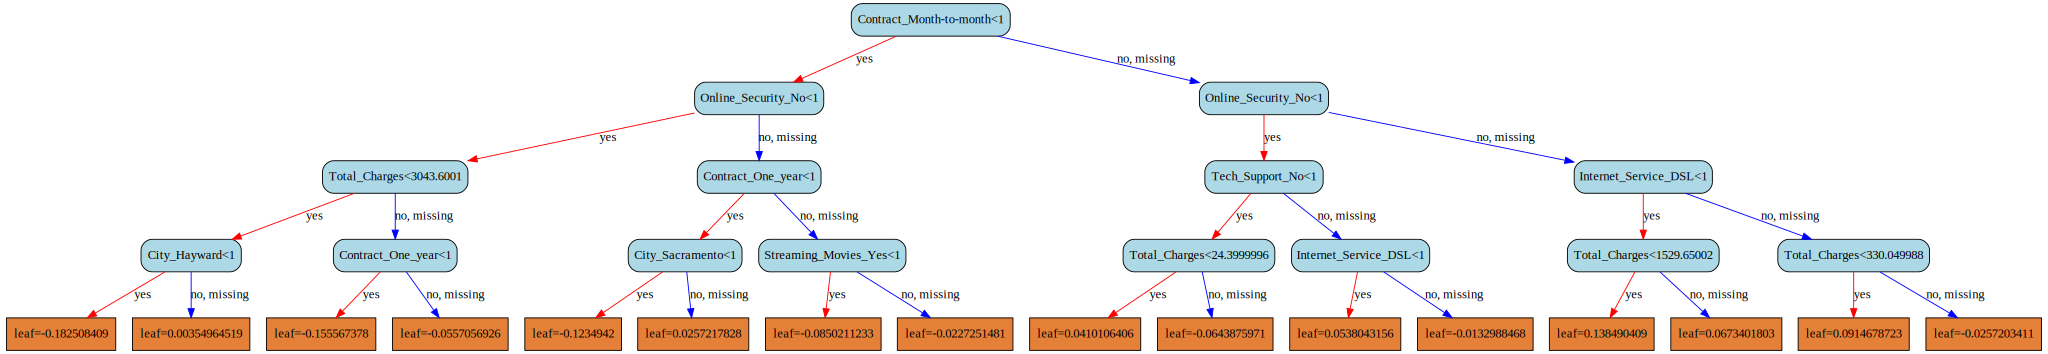

In [35]:
os.environ["PATH"]+= os.pathsep + 'C:\Program Files\Graphviz\bin'
xgb.to_graphviz(clf_xgb_final, num_trees=0,
                condition_node_params=node_params2,
                leaf_node_params=leaf_params2)

SHAP Analysis

In [54]:
clf_xgb_shap = xgb.XGBClassifier(seed=42,
                            missing=0,
                            objective='binary:logistic',
                            gamma=0.25,
                            learning_rate=0.1,
                            max_depth=4,
                            reg_lambda=10,
                            scale_pos_weight=3,
                            subsample=0.9,
                            colsample_bytree=0.5,
                            early_stopping_rounds=10,
                            eval_metric='aucpr')
clf_xgb_shap.fit(X_train,
            y_train,
            verbose=True,
            eval_set=[(X_test, y_test)])

[0]	validation_0-aucpr:0.58794
[1]	validation_0-aucpr:0.59046
[2]	validation_0-aucpr:0.60364
[3]	validation_0-aucpr:0.61910
[4]	validation_0-aucpr:0.62818
[5]	validation_0-aucpr:0.62962
[6]	validation_0-aucpr:0.63183
[7]	validation_0-aucpr:0.63234
[8]	validation_0-aucpr:0.63351
[9]	validation_0-aucpr:0.63376
[10]	validation_0-aucpr:0.63309
[11]	validation_0-aucpr:0.63448
[12]	validation_0-aucpr:0.65222
[13]	validation_0-aucpr:0.65132
[14]	validation_0-aucpr:0.65358
[15]	validation_0-aucpr:0.65635
[16]	validation_0-aucpr:0.66213
[17]	validation_0-aucpr:0.65984
[18]	validation_0-aucpr:0.65796
[19]	validation_0-aucpr:0.66043
[20]	validation_0-aucpr:0.65869
[21]	validation_0-aucpr:0.66040
[22]	validation_0-aucpr:0.65953
[23]	validation_0-aucpr:0.65925
[24]	validation_0-aucpr:0.66062
[25]	validation_0-aucpr:0.66064
[26]	validation_0-aucpr:0.66163


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=0.25, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=0, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [55]:
explainer = shap.Explainer(clf_xgb_shap)
shap_values = explainer(X_test)

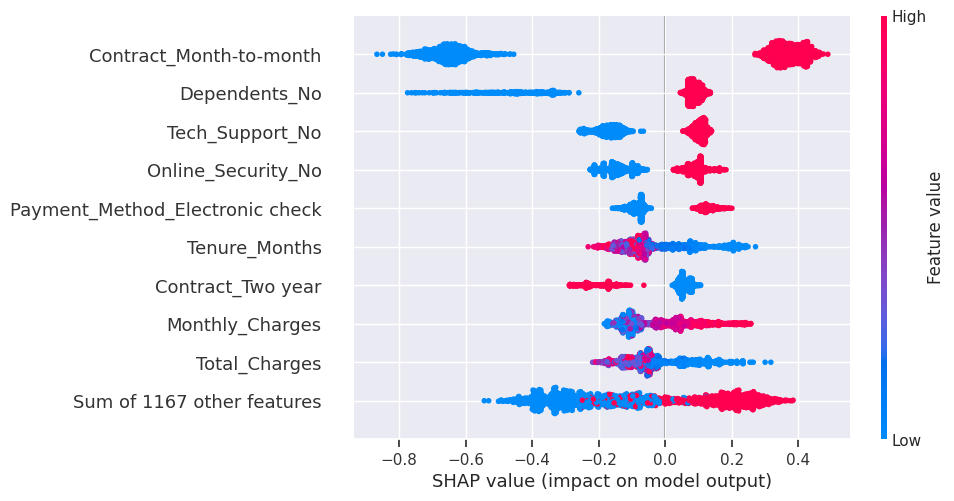

In [56]:
shap.plots.beeswarm(shap_values)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

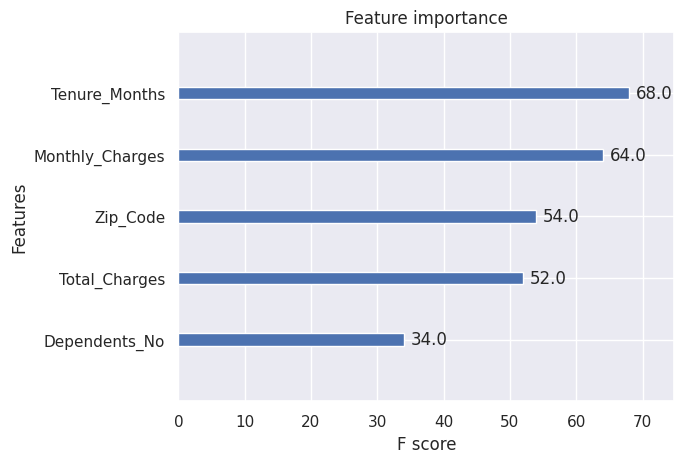

In [106]:
plot_importance(optimal_params.best_estimator_, max_num_features = 5)

# **Another Approach: XGBoost with Target Encoder, Pipeline, and Bayes Grid Search**

In [58]:
# Create a new split.
X2 = df.drop(columns = ["Churn_Value"], axis = 1).copy()
X2.head()
y2 = df["Churn_Value"].copy()
y2.unique()
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, stratify=y2, random_state=8)

In [59]:
# Create a pipeline for training.
# The data set will be encoded by TargetEncoder before getting fit to the clf2.
estimators = [("encoder", TargetEncoder()),
              ("clf", XGBClassifier(random_state = 8))

]

pipe = Pipeline(steps = estimators)
pipe

Pipeline(steps=[('encoder', TargetEncoder()),
                ('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=8, ...))])

In [60]:
# Initiate the BayesSearchCV.
# Define the search space (nested hyperparamters)
search_space = {
    "clf__max_depth": Integer(2, 8),
    "clf__learning_rate": Real(0.001, 1.0, prior = "log-uniform"),
    "clf__subsample": Real(0.5, 1.0),
    "clf__colsample_bytree": Real(0.5, 1.0),
    "clf__colsample_bylevel": Real(0.5, 1.0),
    "clf__colsample_bynode": Real(0.5, 1.0),
    "clf__gamma": Real(0.0, 10.0),
    "clf__reg_alpha": Real(0.0, 10.0),
    "clf__reg_lambda": Real(0.0, 10.0)
}

In [61]:
optimal = BayesSearchCV(pipe, search_space, cv = 3, n_iter = 10, scoring = "roc_auc", random_state = 8)

In [62]:
# Train the model.
optimal.fit(X_train2, y_train2)

BayesSearchCV(cv=3,
              estimator=Pipeline(steps=[('encoder', TargetEncoder()),
                                        ('clf',
                                         XGBClassifier(base_score=None,
                                                       booster=None,
                                                       callbacks=None,
                                                       colsample_bylevel=None,
                                                       colsample_bynode=None,
                                                       colsample_bytree=None,
                                                       device=None,
                                                       early_stopping_rounds=None,
                                                       enable_categorical=False,
                                                       eval_metric=None,
                                                       feature_types=None,
                                                       gamma=None,
                                                       grow_policy=None,
                                                       importance_type=N...
                             'clf__learning_rate': Real(low=0.001, high=1.0, prior='log-uniform', transform='normalize'),
                             'clf__max_depth': Integer(low=2, high=8, prior='uniform', transform='normalize'),
                             'clf__reg_alpha': Real(low=0.0, high=10.0, prior='uniform', transform='normalize'),
                             'clf__reg_lambda': Real(low=0.0, high=10.0, prior='uniform', transform='normalize'),
                             'clf__subsample': Real(low=0.5, high=1.0, prior='uniform', transform='normalize')})

In [63]:
optimal.best_estimator_

Pipeline(steps=[('encoder',
                 TargetEncoder(cols=['City', 'Gender', 'Senior_Citizen',
                                     'Partner', 'Dependents', 'Phone_Service',
                                     'Multiple_Lines', 'Internet_Service',
                                     'Online_Security', 'Online_Backup',
                                     'Device_Protection', 'Tech_Support',
                                     'Streaming_TV', 'Streaming_Movies',
                                     'Contract', 'Paperless_Billing',
                                     'Payment_Method'])),
                ('clf',
                 XGBClassifier(base_score=None, boos...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.0011002938624638172,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=8, ...))])

In [84]:
# AUC score for the training subset.
best_auc2= optimal.best_score_
best_auc2 = (best_auc2*100)
best_auc2 = round(best_auc2, 2)
print(best_auc2)

82.98


In [65]:
# AUC score for the test subset.
optimal.score(X_test2, y_test2)

0.8123317574724225

In [66]:
# Make predictions for individual records.
optimal.predict(X_test2)

array([0, 0, 0, ..., 0, 0, 0])

In [67]:
# Assign class probabilities to individual records.
optimal.predict_proba(X_test2)

array([[0.70254314, 0.29745686],
       [0.7184439 , 0.28155613],
       [0.70543957, 0.2945604 ],
       ...,
       [0.73728126, 0.26271874],
       [0.7226579 , 0.27734208],
       [0.7057034 , 0.2942966 ]], dtype=float32)

In [68]:
# Check feature importance.
optimal.best_estimator_.steps

[('encoder',
  TargetEncoder(cols=['City', 'Gender', 'Senior_Citizen', 'Partner', 'Dependents',
                      'Phone_Service', 'Multiple_Lines', 'Internet_Service',
                      'Online_Security', 'Online_Backup', 'Device_Protection',
                      'Tech_Support', 'Streaming_TV', 'Streaming_Movies',
                      'Contract', 'Paperless_Billing', 'Payment_Method'])),
 ('clf',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=0.5331080642783614,
                colsample_bynode=0.7262320733948379,
                colsample_bytree=0.5362052518135637, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=7.436578137661654,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=0.0011002938624638172,
                max_bin=None, max_cat_threshold=None, max_cat_to_

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

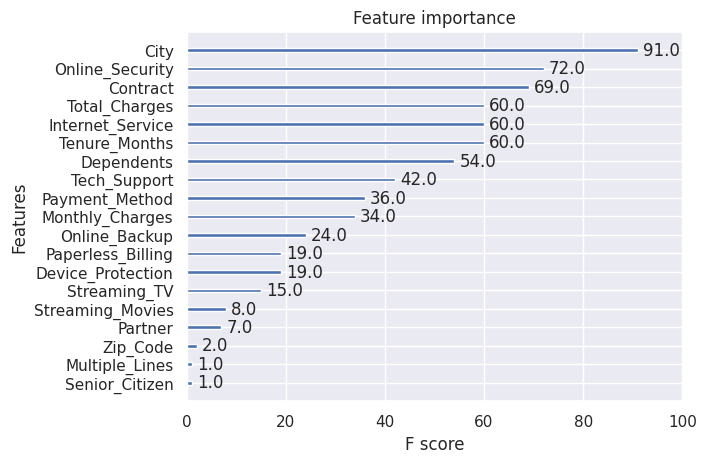

In [69]:
# Plot the number of times each feature appears in a tree.
xgboost2 = optimal.best_estimator_.steps[1]
xgboost2_model = xgboost2[1]
plot_importance(xgboost2_model)

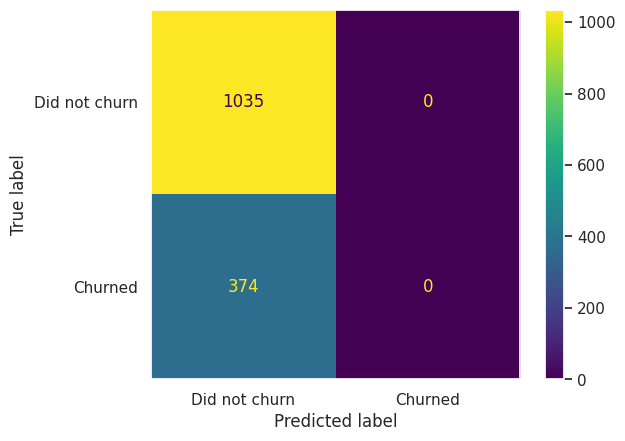

In [70]:
ConfusionMatrixDisplay.from_estimator(optimal, X_test2, y_test2,
                                      values_format = "d", display_labels = ["Did not churn", "Churned"])
plt.grid(False)
plt.show()